In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
# knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import pylab as plot
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for roc and auc curve
from sklearn.metrics import roc_curve, auc,classification_report
# for cross validation
from sklearn.cross_validation import cross_val_score

In [3]:
data = pd.read_csv('Dataset_spine.csv')

In [4]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Dependent variable,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN,NaN,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN,NaN,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,NaN,NaN,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN,NaN,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN,NaN,NaN


In [5]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope(numeric)', 'Direct_tilt(numeric)',
       'thoracic_slope(numeric)', 'cervical_tilt(numeric)',
       'sacrum_angle(numeric)', 'scoliosis_slope(numeric)',
       'Dependent variable', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [6]:
data['Dependent variable'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
data.dropna(axis = 1, inplace = True)
data.sample()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Dependent variable
263,33.788843,3.67511,25.5,30.113733,128.325356,-1.776111,0.389858,9.673,11.3129,13.23731,-2.244119,10.2925,Normal


Its time to find relevance between our data values

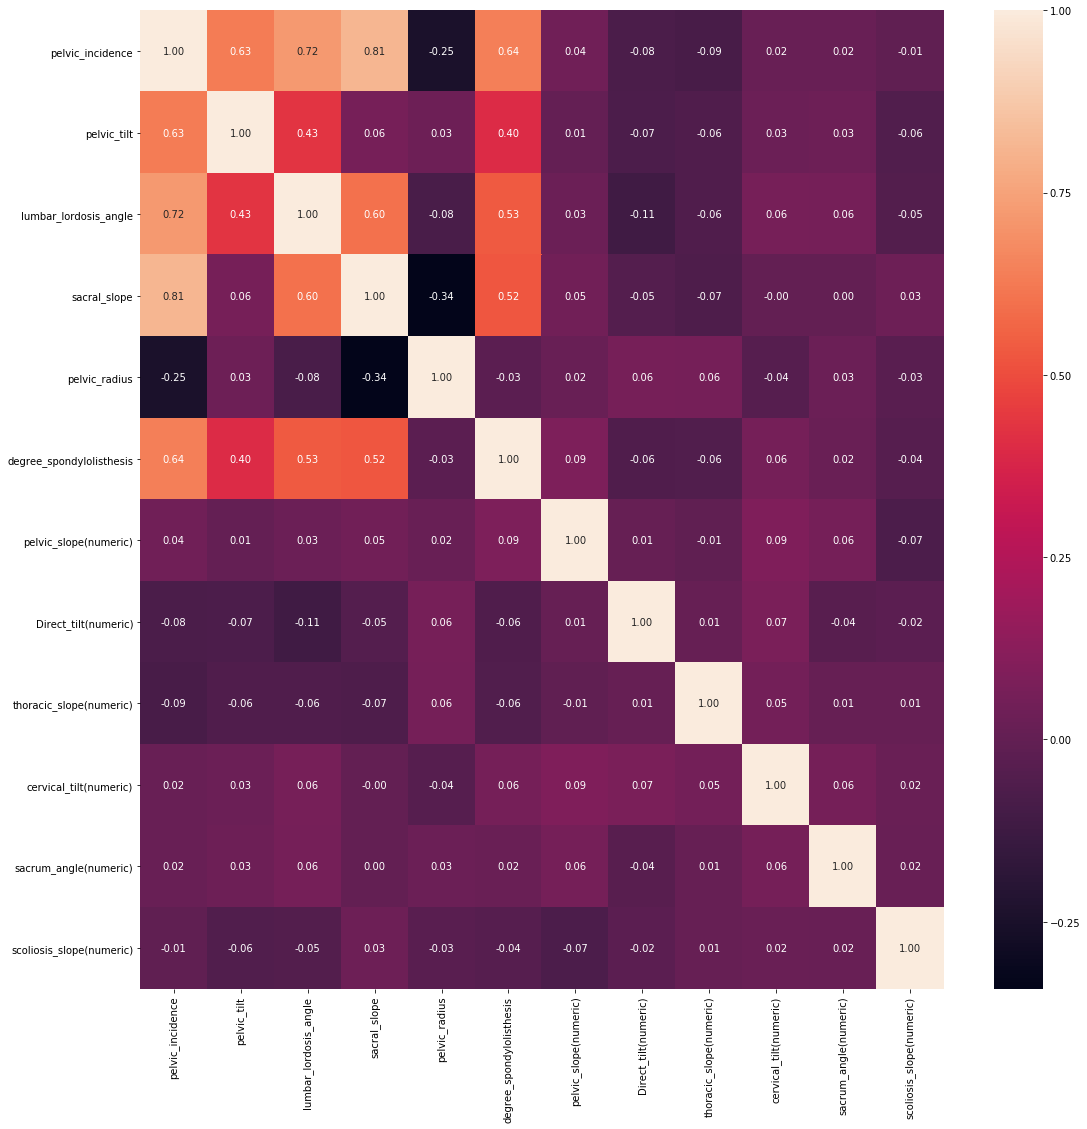

In [8]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', ax = ax)
plt.show()

Lets find out how many class types we have

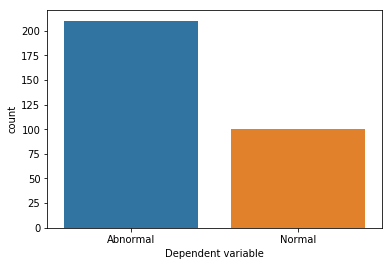

Abnormal    210
Normal      100
Name: Dependent variable, dtype: int64

In [10]:
sns.countplot(data = data, x = 'Dependent variable')
plt.show()
data.loc[:,'Dependent variable'].value_counts()

As you can see we have two types of data whose are abnormal and normal

# We have learned enough about our data so now we can apply some supervised learning algorithms.

In [11]:
#x, y Split and Normalization
x_data = data.iloc[:, 0:12].values
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))#Normalization
y = data.iloc[:, 12]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [13]:
#Grid Search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
grid = {"n_neighbors":np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 10)#cv = How many data split do we want
knn_cv.fit(x_train, y_train)
print("Best number of neighbors is {}".format(knn_cv.best_params_["n_neighbors"]))
print("Best score is {}".format(round(knn_cv.best_score_,2)))

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best number of neighbors is 9
Best score is 0.86


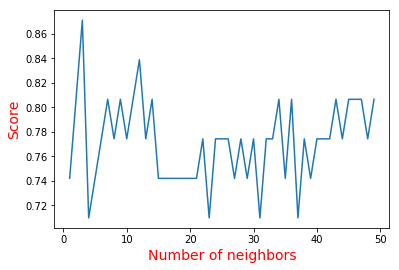

In [14]:
#Grid Search Visualization
score = []
for i in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score.append(knn2.score(x_test, y_test))
plt.plot(np.arange(1,50), score)
plt.xlabel("Number of neighbors", color = "red", fontsize = 14)
plt.ylabel("Score", color = "red", fontsize = 14)
plt.show()

# Let's implement Logistic Regression to our data.

In [27]:
lr = LogisticRegression(max_iter = 80)#max_iter is for forward and backward propogation
lr.fit(x_train, y_train)
lr.score(x_test, y_test)


C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6774193548387096

# **Decision Tree Classifier With K-fold Cross Validation And Confusion Matrix**

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 1)
dtc.fit(x_train, y_train)



#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtc.predict(x_test))
print("Confusion Matrix \n",cm)
print(classification_report)


Confusion Matrix 
 [[19  2]
 [ 6  4]]


# So we have 23 true predictions and 8 false predictions

In [18]:
#x, y Split and Normalization
x_data = data.iloc[:, 0:12].values
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))#Normalization
y = data.iloc[:, 12]

#Train, Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

#Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train)

print("Navie Bayes score is", gnb.score(x_test, y_test))

Navie Bayes score is 0.7741935483870968


C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
#max_depth = The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
#n_estimators = The number of trees in the forest.
rfc.fit(x_train, y_train)

print("Random Forest score is", rfc.score(x_test, y_test))

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forest score is 0.6451612903225806


In [20]:
from sklearn import svm
model = svm.SVC() 
model.fit(x_train, y_train)
print("Support Vector Machine score is", model.score(x_test, y_test))

Support Vector Machine score is 0.6774193548387096


C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)